# Check header/tail removal
We do some basic checks comparing the length of the 'raw/' and the 'text/' files

In [98]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
pattern="*"

In [74]:
A = !wc -l ../data/raw/{pattern}
raw_length = {
    x.split("/")[-1].split("_")[0]:x.replace(" ","").split("..")[0]
    for x in A
    if x.find("total")==-1
}

In [75]:
A = !wc -l ../data/text/{pattern}
text_length = {
    x.split("/")[-1].split("_")[0]:x.replace(" ","").split("..")[0]
    for x in A
    if x.find("total")==-1
}

In [76]:
common_books = list(set(raw_length).intersection(set(text_length)))

In [129]:
lengths_df = pd.DataFrame(
    data=np.array([[int(raw_length[b]),int(text_length[b])] for b in common_books]),
    index=common_books,
    columns=["raw","text"]
)

In [137]:
lengths_df = lengths_df.iloc[np.argsort([int(x[2:]) for x in lengths_df.index])[::-1],:]

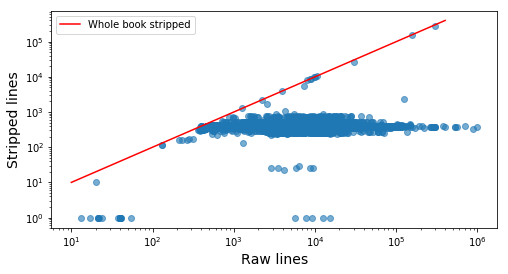

In [138]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(
    lengths_df.raw,
    lengths_df.raw-lengths_df.text,
    alpha=0.6)
ax.plot([10,4e5],[10,4e5],color="red",label="Whole book stripped")
ax.set_xlabel("Raw lines",fontsize=14)
ax.set_ylabel("Stripped lines",fontsize=14)
ax.legend()

So we clearly see some outliers:
+ books for which almost everything was removed (close to red line)
+ books for which almost nothing was removed (close to bottom)
+ others (could be different languages or old books)

In [139]:
meta = pd.read_csv("../metadata/metadata.csv")

In [140]:
lang = meta.set_index("id").language.dropna()

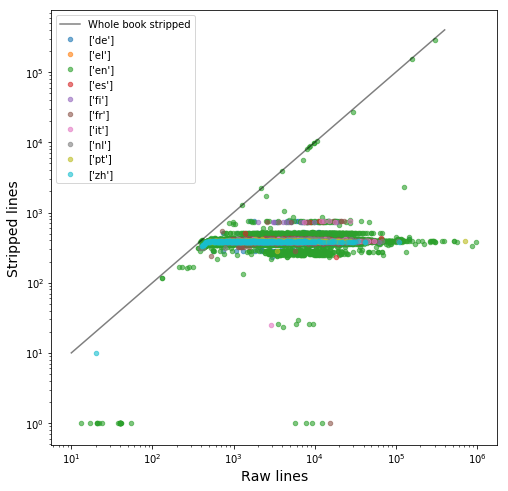

In [141]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xscale("log")
ax.set_yscale("log")
for lab,df in lengths_df.groupby(lang):
    if Counter(lang)[lab]>200:
        ax.scatter(
            df.raw,
            df.raw-df.text,
            alpha=0.6,
            s=20,
            label=lab
        )
ax.plot([10,4e5],[10,4e5],color="black",label="Whole book stripped",alpha=0.5)
ax.set_xlabel("Raw lines",fontsize=14)
ax.set_ylabel("Stripped lines",fontsize=14)

ax.legend()

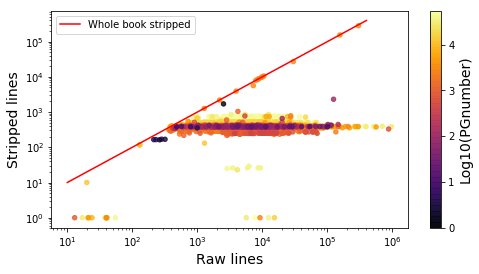

In [142]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.set_xscale("log")
ax.set_yscale("log")
scat = ax.scatter(
    lengths_df.raw,
    lengths_df.raw-lengths_df.text,
    s=20,
    cmap="inferno",
    c=map(lambda x:np.log10(float(x[2:])),lengths_df.index),
    alpha=0.8)
ax.plot([10,4e5],[10,4e5],color="red",label="Whole book stripped")
ax.set_xlabel("Raw lines",fontsize=14)
ax.set_ylabel("Stripped lines",fontsize=14)
ax.legend()
cbar = plt.colorbar(scat)
cbar.set_label("Log10(PGnumber)",fontsize=14)